# This notebook contains more advanced examples

In [1]:
from __future__ import division, absolute_import, print_function
%matplotlib inline

import lmfit
import matplotlib.pyplot as plt
import numpy as np

from resonator import background, reflection, see

In [2]:
# Make some fake data to use for the example fits
f_r = 1e9
frequency = np.linspace(f_r - 1e6, f_r + 1e6, 501)
bg = background.MagnitudePhase().func(frequency=frequency, magnitude=0.01, phase=np.pi / 3)
fg = reflection.LinearReflection().func(frequency=frequency, resonance_frequency=f_r, internal_loss=1e-5, coupling_loss=5e-5)
data = bg * fg + 0.0002 * (np.random.randn(frequency.size) + 1j * np.random.randn(frequency.size))

## Use initial params to improve on the guessing function

The default algorithm used by `lmfit` is Levenberg-Marquardt, which is fast but finds only the local minimum of the residual function given by the initial values. The most common reason for a fit to fail is that the `guess` function provides initial values that are in a local minimum that is not the global minimum. If a data set that looks "reasonable" fails to converge to the correct values, a quick fix is to try different initial values. If best-fit parameters from a previous successful fit are available and the data to be fit is similar, this same technique can be used to accelerate the fit or achieve convergence.

[[Model]]
    (Model(magnitude_phase) * Model(linear_reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 1002
    # variables        = 5
    chi-square         = 3.9181e-05
    reduced chi-square = 3.9299e-08
    Akaike info crit   = -17081.1830
    Bayesian info crit = -17056.6342
[[Variables]]
    magnitude:            0.01000224 +/- 9.2846e-06 (0.09%) (init = 0.009968521)
    phase:                1.04779047 +/- 9.2701e-04 (0.09%) (init = 1.113417)
    resonance_frequency:  1.0000e+09 +/- 106.891150 (0.00%) (init = 1e+09)
    coupling_loss:        4.9865e-05 +/- 1.7639e-07 (0.35%) (init = 5.332321e-05)
    internal_loss:        9.8206e-06 +/- 2.1701e-07 (2.21%) (init = 1.467666e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(magnitude, internal_loss)     =  0.258
    C(phase, resonance_frequency)   = -0.253
    C(coupling_loss, internal_loss) =  0.173



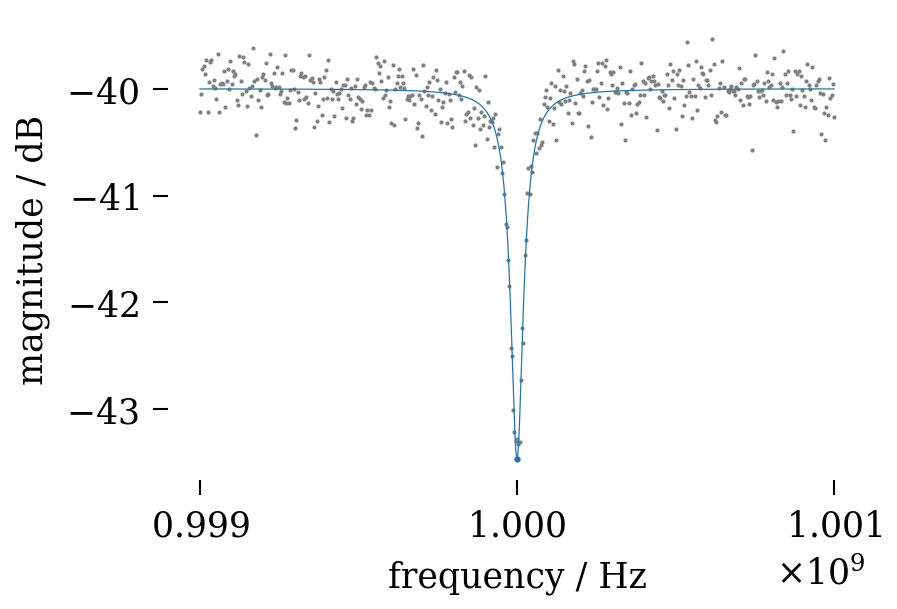

In [3]:
params = lmfit.Parameters()
params.add(name='resonance_frequency', value=1e9) 
r = reflection.LinearReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = see.magnitude_vs_frequency(resonator=r)
print(r.result.fit_report())

## Use initial parameters to control whether or not to vary a parameter in the fit

For example, the value of the coupling can be fixed to a value from a simulation. 

[[Model]]
    (Model(magnitude_phase) * Model(linear_reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 1002
    # variables        = 4
    chi-square         = 3.9204e-05
    reduced chi-square = 3.9283e-08
    Akaike info crit   = -17082.5922
    Bayesian info crit = -17062.9531
[[Variables]]
    magnitude:            0.01000259 +/- 9.2715e-06 (0.09%) (init = 0.009968521)
    phase:                1.04779012 +/- 9.2782e-04 (0.09%) (init = 1.113417)
    resonance_frequency:  1.0000e+09 +/- 110.078310 (0.00%) (init = 1.000002e+09)
    coupling_loss:        5e-05 (fixed)
    internal_loss:        9.8488e-06 +/- 2.1402e-07 (2.17%) (init = 1.467666e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(phase, resonance_frequency) = -0.257
    C(magnitude, internal_loss)   =  0.253



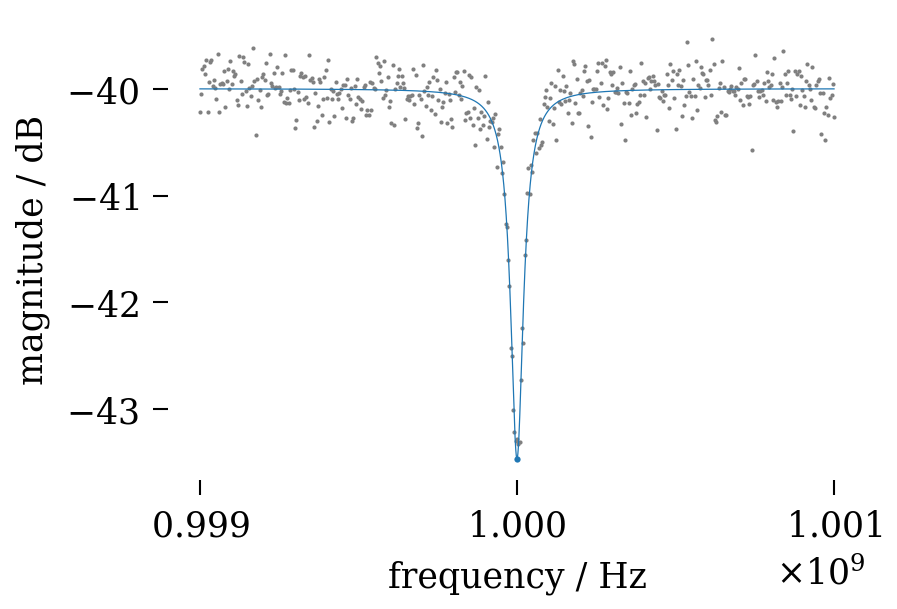

In [4]:
params = lmfit.Parameters()
params.add(name='coupling_loss', value=5e-5, vary=False)
r = reflection.LinearReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = see.magnitude_vs_frequency(resonator=r)
print(r.result.fit_report())  # Note that coupling_loss is now fixed